In [1]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts

# STATS 306
## Homework 2:  Using `dplyr`

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Naming frequency (4 points)
Problem 1 is based on the `babynames` data set. Use help(babynames) to learn more on this dataset

In [2]:
install.packages("babynames")
library(babynames)
summary(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



      year          sex                name                 n          
 Min.   :1880   Length:1924665     Length:1924665     Min.   :    5.0  
 1st Qu.:1951   Class :character   Class :character   1st Qu.:    7.0  
 Median :1985   Mode  :character   Mode  :character   Median :   12.0  
 Mean   :1975                                         Mean   :  180.9  
 3rd Qu.:2003                                         3rd Qu.:   32.0  
 Max.   :2017                                         Max.   :99686.0  
      prop          
 Min.   :2.260e-06  
 1st Qu.:3.870e-06  
 Median :7.300e-06  
 Mean   :1.363e-04  
 3rd Qu.:2.288e-05  
 Max.   :8.155e-02  

**(a)** What were the top five most popular names for boys and girls in 1925? _1 point_

The top five most popular names for girls in 1925 were Mary, Dorothy, Betty, Helen and Margaret. The top five most popular names for boys in 1925 were Robert, John, William, James and Charles.

In [3]:
# Your solution here
#group_by(babynames, year, sex) %>% top_n(5) %>% filter(year == 1925) %>% print
babynames %>% group_by(sex) %>%
  filter(year == 1925) %>% top_n(5, prop) %>% ungroup() %>%
  select(sex, name, prop)

sex,name,prop
<chr>,<chr>,<dbl>
F,Mary,0.05589296
F,Dorothy,0.03053659
F,Betty,0.02597866
F,Helen,0.02309443
F,Margaret,0.01936860
M,Robert,0.05288659
M,John,0.04967411
M,William,0.04629227
M,James,0.04575208


**(b)** Use `ggplot` to create a plot of the frequency of the name "Arya" over the years among boys and girls, respectively. Does anything noteworthy jump out at you from the plot? Can you explain why this happened? _1 point_

I think something noteworthy that jumps out at me from the plot is the drastic increase in the name Arya for females after 2010. I think that this name was never really anything, but around 2010, it became a lot more popular which therefore caused a huge increase in the frequency of the name.

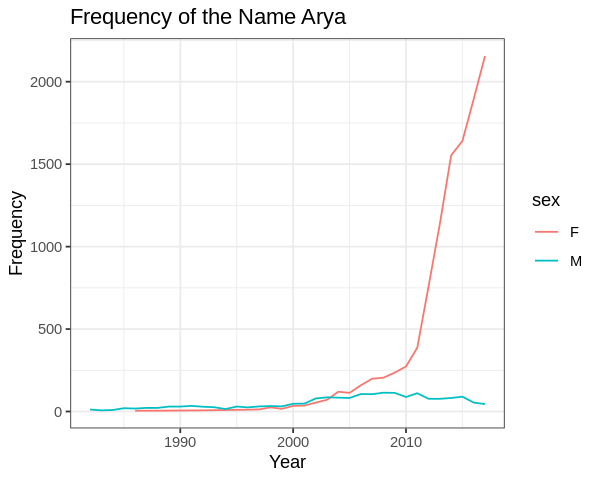

In [5]:
# Your solution here
babynames %>% 
  filter(name == "Arya") %>%
    ggplot(aes(x = year, y = n, color = sex)) +
    geom_line() +
    ggtitle("Frequency of the Name Arya") +
    xlab("Year") +
    ylab("Frequency") + theme_bw()

**(c)** Define a name to be "timeless" if it was among the ten most popular names in both 2015 and 1915. How many timeless names are there, and what are they? _2 points_

 There are only two timeless names which are William and James.

In [6]:
# Your solution here
#group_by(babynames, year, sex) %>% top_n(10) %>% filter(year == 1915) %>% print
#group_by(babynames, year, sex) %>% top_n(10) %>% filter(year == 2015) %>% print
top10_1915 = babynames %>% filter(year == 1915) %>%
  top_n(10, prop) %>% select(name)
top10_2015 = babynames %>% filter(year == 2015) %>%
  top_n(10, prop) %>% select(name)
top10_1915 %>% filter(name %in% top10_2015$name)

name
<chr>
William


## Problem 2: Manipulating `flights` (4 points)
This problem contines with the `flights` table that we saw this week in lecture. Recall that we first need to load this database by typing:

In [ ]:
library(nycflights13)

(If you are running on Google Colab, you will also need to install this package each time you start the notebook.)

**(a)** Use `filter()` to find all the flights that had an arrival delay of more than two hours. How many of these flights were there? *1/2 point*

There were 10,200 flights that had an arrival delay of more than two hours.

In [7]:
# Your solution here
#flights %>%
 # group_by(year, month, day) %>%
 # filter(arr_delay >= 120) %>%
 # print
flights %>% filter(arr_delay > 120) %>% nrow()

[1] 10034

**(b)** Was there a flight scheduled on every day of 2013? If so, write code that verifies this. If not, write code that shows which days had no scheduled flights. *1/2 point*

Since the table below has 365 rows, it verifies that there was a flight scheduled on every day of 2013.

In [12]:
# Your solution here
#group_by(flights, month, day) %>% 
#  summarise(n = n()) %>% 
 #   print
flight_dates <- flights %>% filter(year == 2013) %>% 
  mutate(date = as.Date(time_hour)) %>%
    pull(date) %>% unique() 
check_dates <- seq(as.Date("2013-01-01"), as.Date("2013-12-31"), by = "day")
check_dates[!check_dates %in% flight_dates]

Date of length 0

**(c)** Say you want to maximize your chance of taking a flight that leaves on time (or early). Which airport and carrier should you choose? (For example, "UA departing out of EWR"). Support your reasoning with code. _1 point_

B6 out of JFK.

In [14]:
# Your solution here
#flights %>%
 # group_by(origin, carrier) %>%
 # filter(dep_delay <= 0) %>%
 # summarize(n = n()) %>%
 # print
flights %>% group_by(origin, carrier) %>% 
  summarize(per_on_time = sum(is.na(dep_delay) | dep_delay <= 0 / n())) %>%
    ungroup() %>% arrange(-per_on_time) %>% slice_head(n = 1)

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


origin,carrier,per_on_time
<chr>,<chr>,<int>
JFK,B6,25206


**(d)** What time of day should you fly if you want to avoid delays as much as possible? _2 points_ (This question is intentionally open-ended. There is no one correct answer. Use the data and the commands we have learned to argue your case.)

Based off the information below, it seems that the best time to fly if you want to avoid delays as much as possible is by flying during the late afternoon to evening. Majority of the flights listed below that have an average delay of less than or equal to 0 were flights in the late afternoon to evening time.

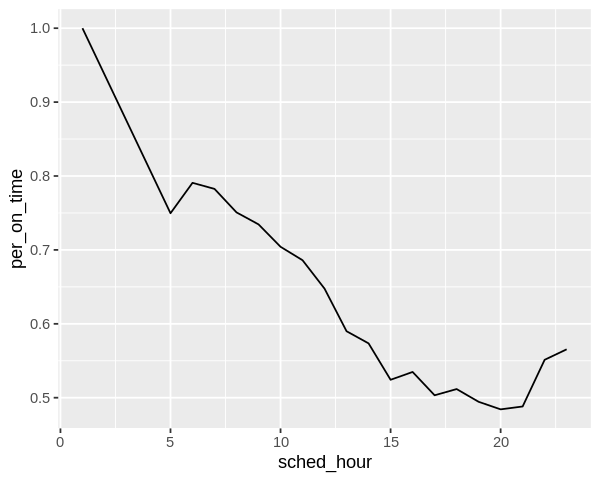

In [15]:
# Your solution here
#new_df = mutate(flights, avg_delay = (dep_delay + arr_delay)/2)
#new_df %>%
 # group_by(avg_delay, time_hour) %>%
 # filter(avg_delay <= 0) %>%
 # summarize() %>%
 # print
flights %>% mutate(sched_hour = lubridate::hour(time_hour)) %>%
  group_by(sched_hour) %>%
  summarize(per_on_time = sum(is.na(dep_delay) | dep_delay <= 0)/n()) %>%
  ungroup() %>% ggplot(aes(x = sched_hour, y = per_on_time)) + geom_line()

## Problem 3: Challenge problem (3 points)
Define a flight to be *spooky* if it was in transit at 13:13h (i.e. 1:13pm) on Friday the 13th of any month. You should assume that a flight is in transit between its `dep_time` and its `arr_time`. How many spooky flights are there in the dataset?

Since the year is 2013, we know that Friday the 13th occurred in the months of September and December. Based on that, it was determined that there were 233 spooky flights in the dataset.

In [ ]:
# Your solution here
nrow(filter(flights, (day == 13 & (month == 9 | month == 12)), (dep_time < 1313) & (arr_time > 1313))) %>% print

[1] 233
